<h1>Business Understanding</h1>

<p>
The data is about the COVID-19 panademic which illustrates the confirmed,deaths and recovered cases of the whole country , in this project the country Paksitan was selected to perform analytics ,the purpose of this analysis is to give proper numbers in understanding of all the parameters for COVID-19 impact
</p>

<p>
With the given dataset we will try to gain proper numbers of the confirmed,deaths and recovered cases from the follwing :
<ol>
<li>Find out the number of confirmed Corona Virus cases in Pakistan each month?</li>
<li>Find out the number of deaths due to Corona Virus in Pakistan each month?</li>
<li>Find out the number of Recovery Corona Virus cases in Pakistan each month?</li>
<li>Predict the Growth of Corona Virus Cases in Pakistan for 2020?</li>
</ol>
</p>

<h1> 1) Importing Libraries </h1>


In [592]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import pandas as pd 
import random
import math
import time
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline 

<h1>2) Loading Data For Understanding</h1>


In [569]:
data_frame=pd.read_csv('covid_19_clean_complete.csv')
data_frame

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.000000,65.000000,1/22/20,0,0,0
1,NaN,Albania,41.153300,20.168300,1/22/20,0,0,0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0,0,0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0,0,0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0,0,0
...,...,...,...,...,...,...,...,...
22789,Saint Pierre and Miquelon,France,46.885200,-56.315900,4/17/20,1,0,0
22790,NaN,South Sudan,6.877000,31.307000,4/17/20,4,0,0
22791,NaN,Western Sahara,24.215500,-12.885800,4/17/20,6,0,0
22792,NaN,Sao Tome and Principe,0.186360,6.613081,4/17/20,4,0,0


<h1>3) Accessing Relevant Columns </h1>

In [570]:
data_frame.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered'],
      dtype='object')

<h1>Total Overview</h1>


In [571]:
data_frame.describe()

,Lat,Long,Confirmed,Deaths,Recovered
count,22794.000000,22794.000000,22794.000000,22794.000000,22794.000000
mean,21.433571,22.597991,1640.460428,90.792665,400.573747
std,24.740963,70.571044,16122.095625,1007.048793,3809.666365
min,-51.796300,-135.000000,-1.000000,-1.000000,0.000000
25%,7.000000,-19.020800,0.000000,0.000000,0.000000
50%,23.659750,20.921188,2.000000,0.000000,0.000000
75%,41.204400,81.000000,127.000000,1.000000,9.000000
max,71.706900,178.065000,699706.000000,36773.000000,83114.000000


<h1>4) Data Cleaning - Gathering Data For Pakistan

In [572]:
PAK_COVID19 = data_frame[data_frame['Country/Region'] == 'Pakistan']
# Drop Columns Province/State , Lat & Long we dont need them
to_drop = ['Province/State','Lat','Long']
PAK_COVID19.drop(to_drop, inplace=True, axis=1)
# Remove Null Data 
PAK_COVID19 = PAK_COVID19[PAK_COVID19.Confirmed !=0]
PAK_COVID19 = PAK_COVID19[PAK_COVID19.Deaths !=0]
PAK_COVID19 = PAK_COVID19[PAK_COVID19.Recovered !=0]
PAK_COVID19

,Country/Region,Date,Confirmed,Deaths,Recovered
15111,Pakistan,3/19/20,454,2,13
15373,Pakistan,3/20/20,501,3,13
15635,Pakistan,3/21/20,730,3,13
15897,Pakistan,3/22/20,776,5,5
16159,Pakistan,3/23/20,875,6,5
16421,Pakistan,3/24/20,972,7,18
16683,Pakistan,3/25/20,1063,8,21
16945,Pakistan,3/26/20,1201,9,21
17207,Pakistan,3/27/20,1373,11,23
17469,Pakistan,3/28/20,1495,12,29


<h1> 5) Analyze Data </h1>

In [573]:
# get total count for the avaliable months
def total_in_months(column_name):
    '''Filtering Data Month wise and getting results'''
    PAK_COVID19['Date'] = pd.to_datetime(PAK_COVID19['Date'])
    PAK_COVID19.index=PAK_COVID19['Date']
    Month_Data=PAK_COVID19[str(column_name)].resample('M').sum()
    return Month_Data


<h1> 6) Visualize Data</h1>

In [574]:
# Visualization in BARCHART function
def Visualize_data(Month_Data):
    plt.figure(figsize=(15, 8))
    plt.bar(Month_Data.index.strftime('%B'),Month_Data[:])
    plt.title('# of Coronavirus Cases Over Time', size=30)
    plt.xlabel('Months', size=30)
    plt.ylabel('Cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()
    


<h2>Question # 1:
Find out the number of confirmed Corona Virus cases in Pakistan each month?
</h2>

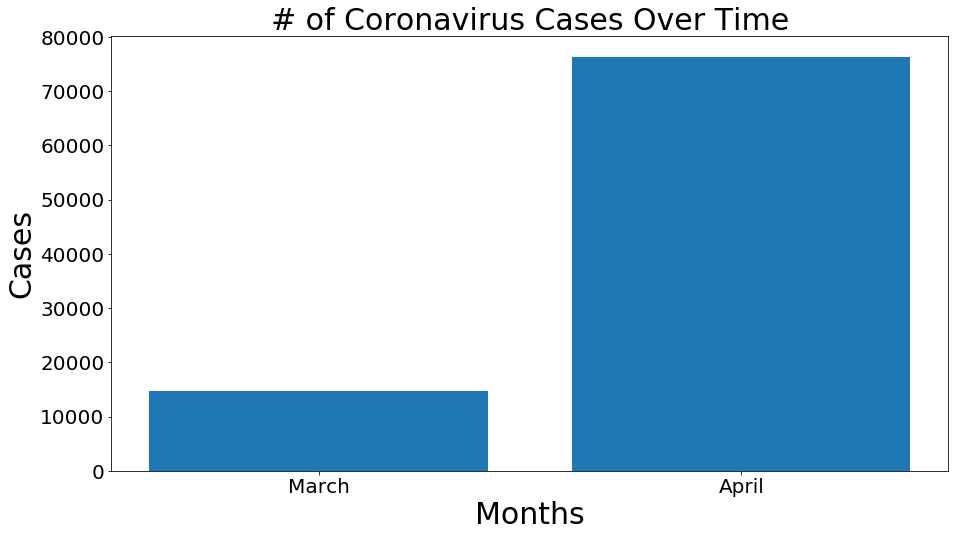

In [575]:
# Confirmed Corona Virus Cases in Pakistan
Visualize_data(total_in_months('Confirmed'))

<h2>Question # 2: Find out the number of Deaths due to Corona Virus in Pakistan each month?</h2>

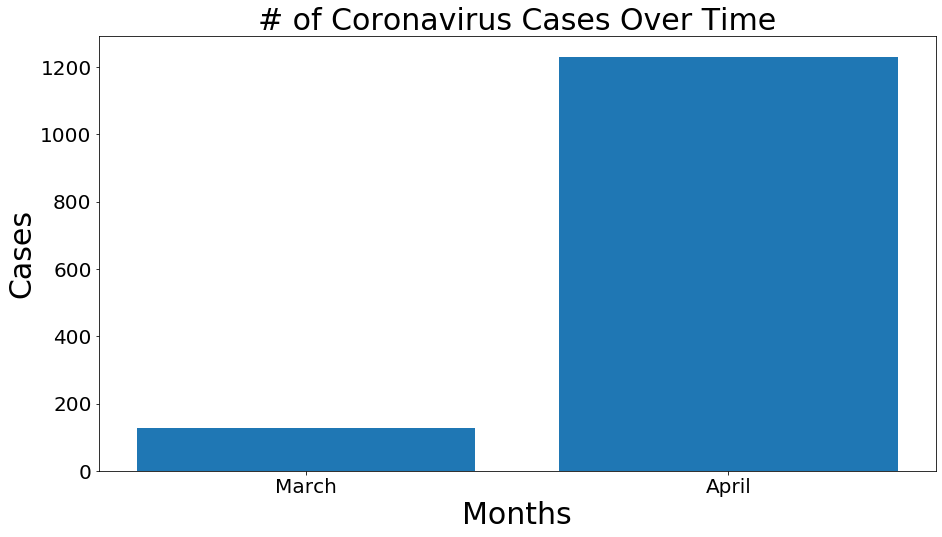

In [576]:
Visualize_data(total_in_months('Deaths'))

<h2>Question # 3: Find out the number of Recovered due to Corona Virus in Pakistan each month?</h2>

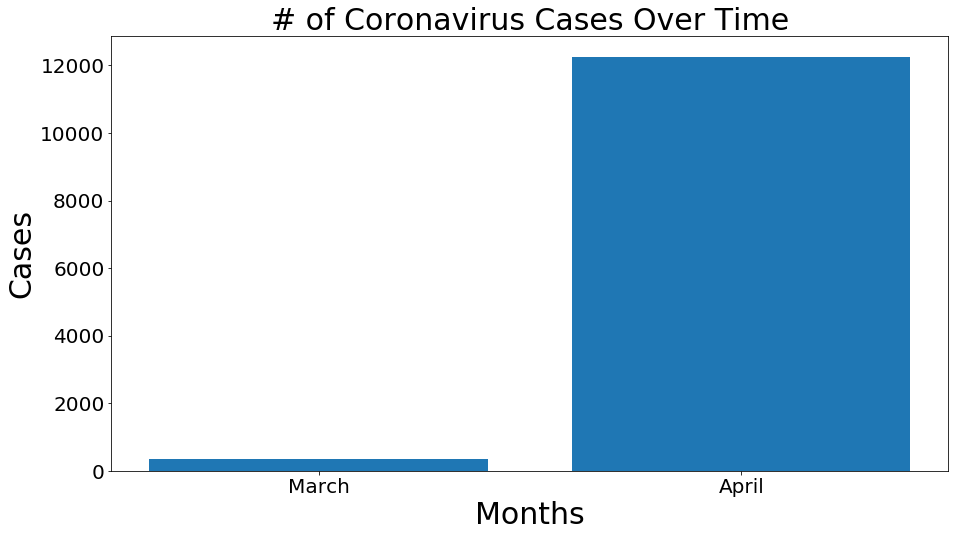

In [577]:
Visualize_data(total_in_months('Recovered'))

<h2>Question # 4: Predict the Growth of Corona Virus Cases in Pakistan for 2020?</h2>

<h1> Linear Regression Model to Predict Growth </h1>

In [620]:
# Next 8 months Forcasting
#months in days
future_months = 244
future_forcast = np.array([i for i in range(future_months)]).reshape(-1, 1)
adjusted_dates = future_forcast[:-244]

In [624]:
# List all the remaining months
start = '3/19/20'
start_date = datetime.datetime.strptime(start, '%m/%d/%y')
future_forcast_dates = []
for i in range(len(future_forcast)):
    future_forcast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))
future_cases=np.array(future_forcast_dates).reshape(-1,1)
future_cases

array([['03/19/2020'],
       ['03/20/2020'],
       ['03/21/2020'],
       ['03/22/2020'],
       ['03/23/2020'],
       ['03/24/2020'],
       ['03/25/2020'],
       ['03/26/2020'],
       ['03/27/2020'],
       ['03/28/2020'],
       ['03/29/2020'],
       ['03/30/2020'],
       ['03/31/2020'],
       ['04/01/2020'],
       ['04/02/2020'],
       ['04/03/2020'],
       ['04/04/2020'],
       ['04/05/2020'],
       ['04/06/2020'],
       ['04/07/2020'],
       ['04/08/2020'],
       ['04/09/2020'],
       ['04/10/2020'],
       ['04/11/2020'],
       ['04/12/2020'],
       ['04/13/2020'],
       ['04/14/2020'],
       ['04/15/2020'],
       ['04/16/2020'],
       ['04/17/2020'],
       ['04/18/2020'],
       ['04/19/2020'],
       ['04/20/2020'],
       ['04/21/2020'],
       ['04/22/2020'],
       ['04/23/2020'],
       ['04/24/2020'],
       ['04/25/2020'],
       ['04/26/2020'],
       ['04/27/2020'],
       ['04/28/2020'],
       ['04/29/2020'],
       ['04/30/2020'],
       ['05

In [628]:
#Array of Confirmed Cases
confirmed_cases=np.array(PAK_COVID19['Confirmed']).reshape(-1,1)
dates=np.array(PAK_COVID19['Date']).reshape(-1,1)

In [641]:
#Splitting Data into Train and Test Dataset
X_train = confirmed_cases
Y_train = dates

In [648]:
#Model Training 
linear_model = LinearRegression(normalize=True, fit_intercept=False)
linear_model.fit(X_train,Y_train)
linear_pred = linear_model.predict(future_forcast)
#Visualize
linear_pred

array([[0.e+00],
       [4.e+14],
       [7.e+14],
       [1.e+15],
       [1.e+15],
       [2.e+15],
       [2.e+15],
       [3.e+15],
       [3.e+15],
       [3.e+15],
       [4.e+15],
       [4.e+15],
       [4.e+15],
       [5.e+15],
       [5.e+15],
       [5.e+15],
       [6.e+15],
       [6.e+15],
       [6.e+15],
       [7.e+15],
       [7.e+15],
       [8.e+15],
       [8.e+15],
       [8.e+15],
       [9.e+15],
       [9.e+15],
       [9.e+15],
       [1.e+16],
       [1.e+16],
       [1.e+16],
       [1.e+16],
       [1.e+16],
       [1.e+16],
       [1.e+16],
       [1.e+16],
       [1.e+16],
       [1.e+16],
       [1.e+16],
       [1.e+16],
       [1.e+16],
       [1.e+16],
       [1.e+16],
       [2.e+16],
       [2.e+16],
       [2.e+16],
       [2.e+16],
       [2.e+16],
       [2.e+16],
       [2.e+16],
       [2.e+16],
       [2.e+16],
       [2.e+16],
       [2.e+16],
       [2.e+16],
       [2.e+16],
       [2.e+16],
       [2.e+16],
       [2.e+16],
       [2.e+16

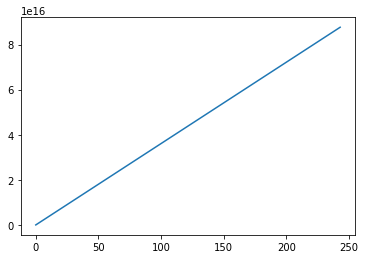

In [651]:
plt.plot(linear_pred)

<h1>7) Evaluation</h1>

<p>
We have observed a major increase in all the parameters we considered for the months from March to April
<ol>
<li><h5>Confirmed Cases</h5></li>
<p>Since the panadamice reached in Pakistan there has been a major impact in rise of corona virus cases in march there were 20% confirmed cases due to lack of sanitation and proper awarensss causes a huge impact in rise of 40% which totals to 60% increase !</p>
<li><h5>Deaths Cases</h5></li>
<p>As in march there were not much deaths but due to so many confirmed cases people didnt give focus on the fatality of this virus which cause a hugh increases in the number of deaths from hundreds to thousands !</p>
<li><h5>Recoverd Cases</h5></li>
<p>It is very proud moment for the medical staff and voluntters that quickly responded to the event which caused 90% cases to be recoverd :) with limited amount of resources.</p>
<li><h5>What can we tell for the future</h5></li>
<p>As we dont have much data so a predict model has just showed us that there would be major impact of the Corona Virus this year and we may assume that it can downgrade if a vaccine is developed as soon as possible.</p>

<p>

<h1>8)Conclusion</h1>

<p>From the actual numbers we can conclude that the COVID-19 is not to be taken lightly by far the data shows because the multiplying factor is something which cannot be taken lightly can cause chaos in the whole country its better to have efforts to spend some time at home ,having discipline routines and patience will be a great impact for removing the pandemic from the country.</p>